In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import string

from google.colab import drive

drive.mount('/content/gdrive')

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

!pip install langdetect
from langdetect import detect

Mounted at /content/gdrive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=98241fe269f6dfb0e35f72d08ad9c12d613e90bcf576fed2c569040f6d0d6295
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [ ]:
def write_dict_to_file(file_name, dictionary):
    with open(file_name, 'w') as new_file:
        for key, value in dictionary.items():
            new_file.write('%s : %d\n' % (key, value))

In [ ]:
def make_dics(city):

    raw_IP_txt=open(f'{city}_IP_bow.txt', 'r')
    raw_NP_txt=open(f'{city}_NP_bow.txt', 'r')

    def iterate_raw(file):
        new_dic = {}
        for line in file:
            vals = line.replace(' ', '').split(':')
            key = vals[0].translate(str.maketrans('','',string.punctuation.replace("'", "'’"))).lower()
            if key not in new_dic:
                new_dic[key] = int(vals[1])
            else:
                new_dic[key] += int(vals[1])
        return dict(sorted(new_dic.items(), key=lambda item: item[1]))

    IP_bow = iterate_raw(raw_IP_txt)
    NP_bow = iterate_raw(raw_NP_txt)

    raw_IP_txt.close()
    raw_NP_txt.close()

    return IP_bow, NP_bow

In [ ]:
def make_all_teams_dic():

    raw_txt=open(f'ALL_TEAMS_bow.txt', 'r')

    def iterate_raw(file):
        new_dic = {}
        for line in file:
            vals = line.replace(' ', '').split(':')
            key = vals[0].translate(str.maketrans('','',string.punctuation.replace("'", "'’"))).lower()
            if key not in new_dic:
                new_dic[key] = int(vals[1])
            else:
                new_dic[key] += int(vals[1])
        return dict(sorted(new_dic.items(), key=lambda item: item[1]))

    bow = iterate_raw(raw_txt)

    raw_txt.close()

    return bow

# Create weighted BoW

In [ ]:
IP_bow_lemma_no_stopwords, NP_bow_lemma_no_stopwords = make_lemma_no_stopwords_dics('AZ')

In [ ]:
weighted_bow = {}

for element in NP_bow_lemma_no_stopwords:
    weighted_diff = int(-NP_bow_lemma_no_stopwords[element] / np_to_ip_ratio)
    if element in IP_bow_lemma_no_stopwords:
        weighted_diff = int(IP_bow_lemma_no_stopwords[element] - NP_bow_lemma_no_stopwords[element] / np_to_ip_ratio)

    weighted_bow[element] = weighted_diff

for element in IP_bow_lemma_no_stopwords:
    if element not in weighted_bow:
        weighted_bow[element] = IP_bow_lemma_no_stopwords[element]

write_dict_to_file('weighted_bow.txt', weighted_bow)

# Get weighted BoW

In [ ]:
IP_bow_lemma_no_stopwords, NP_bow_lemma_no_stopwords = make_lemma_no_stopwords_dics('AZ')

In [ ]:
weighted_bow = make_weighted_dic('AZ')

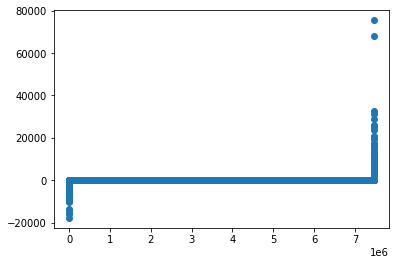

In [ ]:
plt.scatter(range(len(weighted_bow)), weighted_bow.values())
plt.show()

In [ ]:
for i in range(1, 30):
    element = list(weighted_bow.keys())[-i]
    if element not in IP_bow_lemma_no_stopwords:
        IP_bow_lemma_no_stopwords[element] = 0
    if element not in NP_bow_lemma_no_stopwords:
        NP_bow_lemma_no_stopwords[element] = 0
    print(element)
    print('Weighted value  - ', weighted_bow[element])
    print('IP freq  - ', IP_bow_lemma_no_stopwords[element])
    print('NP freq  - ', int(NP_bow_lemma_no_stopwords[element] / np_to_ip_ratio))
    print()

In [ ]:
for i in range(30):
    element = list(weighted_bow.keys())[i]
    if element not in IP_bow_lemma_no_stopwords:
        IP_bow_lemma_no_stopwords[element] = 0
    if element not in NP_bow_lemma_no_stopwords:
        NP_bow_lemma_no_stopwords[element] = 0
    print(element)
    print('Weighted value  - ', weighted_bow[element])
    print('IP freq  - ', IP_bow_lemma_no_stopwords[element])
    print('NP freq  - ', int(NP_bow[element] / np_to_ip_ratio))
    print()

In [ ]:
pruned_weighted_bow = {}

for element in weighted_bow:
    if abs(weighted_bow[element]) > 200:
        pruned_weighted_bow[element] = weighted_bow[element]

print(len(weighted_bow))
print(len(pruned_weighted_bow))

7454605
2758


# Get pruned weighted BoW (over 200 occurrences)

In [ ]:
IP_bow_lemma_no_stopwords, NP_bow_lemma_no_stopwords = make_lemma_no_stopwords_dics('AZ')

In [ ]:
pruned_weighted_bow = make_pruned_weighted_dic('AZ')

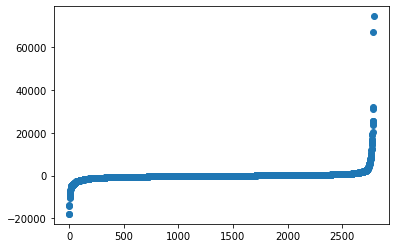

In [ ]:
plt.scatter(range(len(pruned_weighted_bow)), pruned_weighted_bow.values())
plt.show()

# Prepruning

In [ ]:
old_IP_bow, old_NP_bow = make__dics('AZ')

In [ ]:
total_np = 0
total_ip = 0

for element in old_IP_bow:
    if element in stop_words:
        if element in old_NP_bow:
            total_np += old_NP_bow[element]
            total_ip += old_IP_bow[element]

np_to_ip_ratio = total_np / total_ip
print(round(np_to_ip_ratio, 3))

7.659


In [ ]:
NP_bow_prepruned = {}
IP_bow_prepruned = {}

for element in old_NP_bow:
    if old_NP_bow[element] > 5 * np_to_ip_ratio:
        NP_bow_prepruned[element] = old_NP_bow[element]

for element in old_IP_bow:
    if old_IP_bow[element] > 5:
        IP_bow_prepruned[element] = old_IP_bow[element]


print(len(old_NP_bow))
print(len(NP_bow_prepruned))
print('\n')
print(len(old_IP_bow))
print(len(IP_bow_prepruned))

6965066
175750


1356612
151845


In [ ]:
write_dict_to_file('AZ_IP_bow_prepruned.txt', IP_bow_prepruned)

In [ ]:
write_dict_to_file('AZ_NP_bow_prepruned.txt', NP_bow_prepruned)

In [ ]:
IP_bow_prepruned, NP_bow_prepruned = make_prepruned_dics('AZ')

In [ ]:
experimental_weighted_bow = {}

for element in NP_bow_prepruned:
    new_NP = int(-NP_bow_prepruned[element] / np_to_ip_ratio)
    if new_NP == 0:
        new_NP = -1
    weighted_diff = new_NP

    if element in IP_bow_prepruned:
        if IP_bow_prepruned[element] == 0:
            IP_bow_prepruned[element] = 1

        weighted_diff += IP_bow_prepruned[element]

        if weighted_diff > 0:
            weight_ratio = abs(IP_bow_prepruned[element] / new_NP)
            if weight_ratio > 10:
                weight_ratio = 10
            # weighted_diff = int(weighted_diff + (weighted_diff * weight_ratio * 0.2))
            weighted_diff = int(weighted_diff * weight_ratio)
        else:
            weight_ratio = abs(new_NP / IP_bow_prepruned[element])
            if weight_ratio > 10:
                weight_ratio = 10
            # weighted_diff = int(weighted_diff + (weighted_diff * weight_ratio * 0.2))
            weighted_diff = int(weighted_diff * weight_ratio)
    else:
        if new_NP < -10:
            weighted_diff *= 5
        else:
            weighted_diff *= -new_NP
    experimental_weighted_bow[element] = weighted_diff

for element in IP_bow_prepruned:
    if element not in experimental_weighted_bow or NP_bow_prepruned[element] == 0:
        experimental_weighted_bow[element] = IP_bow_prepruned[element]

In [ ]:
write_dict_to_file('AZ_experimental_weighted_bow.txt', experimental_weighted_bow)

In [ ]:
pruned_experimental_weighted_bow = {}

for element in experimental_weighted_bow:
    if abs(experimental_weighted_bow[element]) > 240:
        pruned_experimental_weighted_bow[element] = experimental_weighted_bow[element]

print(len(experimental_weighted_bow))
print(len(pruned_experimental_weighted_bow))

212384
5566


In [ ]:
write_dict_to_file('AZ_pruned_experimental_weighted_bow.txt', pruned_experimental_weighted_bow)

In [ ]:
pruned_experimental_weighted_bow = make_pruned_experimental_dic('AZ')

In [ ]:
stopword_count = 0
lemma_count = 0

for element in list(pruned_experimental_weighted_bow.keys()):
    if element in stop_words:
        del pruned_experimental_weighted_bow[element]
        stopword_count += 1
    else:
        lemma = lemmatizer.lemmatize(element)
        if element != lemma:
            if lemma not in pruned_experimental_weighted_bow:
                pruned_experimental_weighted_bow[lemma] = pruned_experimental_weighted_bow[element]
            else:
                pruned_experimental_weighted_bow[lemma] += pruned_experimental_weighted_bow[element]
                lemma_count += 1
            del pruned_experimental_weighted_bow[element]


print('number of stopwords removed from IP:')
print(stopword_count)

print('number of lemmas removed from NP:')
print(lemma_count)

number of stopwords removed from IP:
103
number of lemmas removed from NP:
162


In [ ]:
with open(f'es.txt', 'r') as file:
    lines = file.readlines()
    spanish_lines = [line.rstrip() for line in lines]

with open(f'words_to_remove.txt', 'r') as file:
    lines = file.readlines()
    extra_to_remove = [line.rstrip() for line in lines]

with open(f'words_to_not_remove.txt', 'r') as file:
    lines = file.readlines()
    not_to_remove = [line.rstrip() for line in lines]


words_to_remove = []

for element in pruned_experimental_weighted_bow:
    try:
        if (element in spanish_lines or detect(element) == 'ar' or detect(element) == 'ja' or detect(element) == 'ko' or detect(element) == 'fa' or detect(element) == 'hi'
            or detect(element) == 'ru' or detect(element) == 'he' or detect(element) == 'ur' or detect(element) == 'bg' or element in extra_to_remove) and not element in not_to_remove:
            words_to_remove.append(element)

    except Exception as e:
        pass

In [ ]:
for element in words_to_remove:
    del pruned_experimental_weighted_bow[element]

In [ ]:
print(words_to_remove)

['que', 'de', 'en', 'من', 'و', 'el', 'por', 'se', 'في', 'para', 'la', 'te', 'si', 'الله', 'ما', 'على', 'una', 'mi', '،', 'لا', 'los', 'como', 'pero', 'im', 'su', 'más', 'ngata', 'كل', 'con', 'un', 'cuando', 'todo', 'esta', 'ولا', 'quiero', 'este', 'bien', 'ان', 'del', 'hoy', 'porque', 'gracias', 'عن', 'ni', 'يا', 'ser', 'هذا', 'todos', 'اللي', 'muy', 'está', 'le', 'día', 'siempre', 'mejor', 'vida', 'مع', 'eso', 'estoy', 'لو', 'tengo', 'dios', 'qué', 'ver', 'así', 'شي', 'hasta', 'tu', 'كان', 'ahora', 'tiene', 'voy', 'decadenceaz', 'بس', 'al', 'انا', 'desde', 'gente', 'hace', 'yo', 'hacer', 'nunca', 'والله', 'ya', 'fue', 'eres', 'asussc', 'и', 'feliz', 'الي', 'amor', 'aquí', 'quien', 'vez', 'esto', 'اللهم', 'donde', 'años', 'estar', 'algo', 'noche', 'tú', 'mundo', 'hay', 'nada', 'pues', 'lo', 'tus', 'é', 'sobre', 'días', 'también', 'à', 'amo', 'cosas', 'tiempo', 'на', 'لي', 'puede', 'telemundoaz', 'بعد', 'да', 'alguien', 'saludos', 'mañana', 'مو', 'لك', 'puedo', 'tener', 'cada', 'قبل', '

In [ ]:
print(len(words_to_remove))

1349


In [ ]:
print(len(pruned_experimental_weighted_bow))

3952


In [ ]:
write_dict_to_file('AZ_pruned_experimental_weighted_bow.txt', pruned_experimental_weighted_bow)
pruned_experimental_weighted_bow = make_pruned_experimental_dic('AZ')

In [ ]:
for i in range(1, 100):
    element = list(pruned_experimental_weighted_bow.keys())[-i]
    if element not in IP_bow_prepruned:
        IP_bow_prepruned[element] = 0
    if element not in NP_bow_prepruned:
        NP_bow_prepruned[element] = 0
    print(element)
    print('Weighted value  - ', pruned_experimental_weighted_bow[element])
    print('IP freq  - ', IP_bow_prepruned[element])
    print('NP freq  - ', int(NP_bow_prepruned[element] / np_to_ip_ratio))
    print()

job
Weighted value  -  125810
IP freq  -  180664
NP freq  -  107717

az
Weighted value  -  104694
IP freq  -  195741
NP freq  -  127530

latest
Weighted value  -  53667
IP freq  -  75673
NP freq  -  44274

hiring
Weighted value  -  45555
IP freq  -  60562
NP freq  -  34563

phoenix
Weighted value  -  44551
IP freq  -  123564
NP freq  -  90819

click
Weighted value  -  43668
IP freq  -  62932
NP freq  -  37152

opening
Weighted value  -  39915
IP freq  -  56740
NP freq  -  33711

apply
Weighted value  -  33750
IP freq  -  46799
NP freq  -  27190

work
Weighted value  -  33134
IP freq  -  102028
NP freq  -  77016


Weighted value  -  30911
IP freq  -  492781
NP freq  -  463694

great
Weighted value  -  26920
IP freq  -  94729
NP freq  -  73766

fit
Weighted value  -  26699
IP freq  -  40328
NP freq  -  24264

recommend
Weighted value  -  26609
IP freq  -  37698
NP freq  -  22099

day
Weighted value  -  23822
IP freq  -  100637
NP freq  -  83195

today
Weighted value  -  22286
IP freq  - 

In [ ]:
for i in range(100):
    element = list(pruned_experimental_weighted_bow.keys())[i]
    if element not in IP_bow_prepruned:
        IP_bow_prepruned[element] = 0
    if element not in NP_bow_prepruned:
        NP_bow_prepruned[element] = 0
    print(element)
    print('Weighted value  - ', pruned_experimental_weighted_bow[element])
    print('IP freq  - ', IP_bow_prepruned[element])
    print('NP freq  - ', int(NP_bow_prepruned[element] / np_to_ip_ratio))
    print()

christmas
Weighted value  -  -77874
IP freq  -  1389
NP freq  -  11118

thanksgiving
Weighted value  -  -26470
IP freq  -  288
NP freq  -  2935

merry
Weighted value  -  -23580
IP freq  -  142
NP freq  -  2500

valentine
Weighted value  -  -20870
IP freq  -  45
NP freq  -  516

wpmoychallenge
Weighted value  -  -16800
IP freq  -  0
NP freq  -  3360

i️
Weighted value  -  -16596
IP freq  -  220
NP freq  -  2024

quarantine
Weighted value  -  -16170
IP freq  -  26
NP freq  -  1643

virus
Weighted value  -  -15490
IP freq  -  124
NP freq  -  1639

coronavirus
Weighted value  -  -15015
IP freq  -  0
NP freq  -  3003

tonight
Weighted value  -  -11966
IP freq  -  25648
NP freq  -  33766

year
Weighted value  -  -10691
IP freq  -  33893
NP freq  -  41139

holiday
Weighted value  -  -10233
IP freq  -  1272
NP freq  -  3065

tomorrow
Weighted value  -  -10209
IP freq  -  13951
NP freq  -  20799

😂
Weighted value  -  -9822
IP freq  -  36657
NP freq  -  44710

pandemic
Weighted value  -  -9420
I

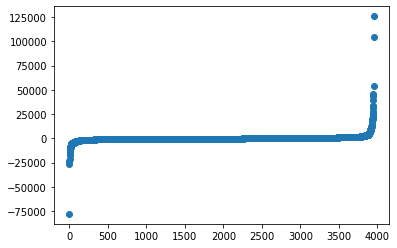

In [ ]:
plt.scatter(range(len(pruned_experimental_weighted_bow)), pruned_experimental_weighted_bow.values())
plt.show()